In [55]:
#logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_csv('C:/Users/mishr/Desktop/User_Data.csv')

data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

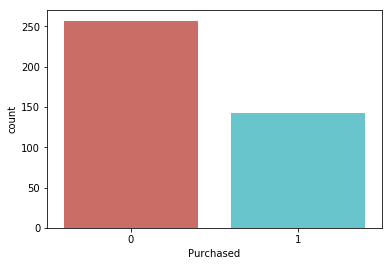

<Figure size 432x288 with 0 Axes>

In [38]:
sns.countplot(x='Purchased',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [43]:
count_no=len(data[data['Purchased']==0])
count_yes=len(data[data['Purchased']==1])
per_of_no=count_no/(count_no+count_yes)
per_of_yes=count_yes/(count_no+count_yes)
print(per_of_no*100)
print(per_of_yes*100)

64.25
35.75


In [48]:
#exploring data 
a=data.groupby('Purchased').mean()
a=a[['Age','EstimatedSalary']]
a

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [51]:
b=data.groupby('Age').mean()
b=b[['EstimatedSalary','Purchased']]
b.head()

,EstimatedSalary,Purchased
Age,,
18,66400.000000,0.0
19,46000.000000,0.0
20,61714.285714,0.0
21,61000.000000,0.0
22,48800.000000,0.0


In [54]:
c=data.groupby('EstimatedSalary').mean()
c=c[['Age','Purchased']]
c.head()

,Age,Purchased
EstimatedSalary,,
15000,28.250000,0.0
16000,23.500000,0.0
17000,27.666667,0.0
18000,29.250000,0.0
19000,21.500000,0.0


Text(0, 0.5, 'Frequency of purchase')

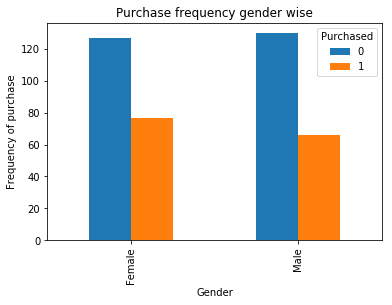

In [61]:
%matplotlib inline
pd.crosstab(data.Gender,data.Purchased).plot(kind='bar')
plt.title('Purchase frequency gender wise')
plt.xlabel('Gender')
plt.ylabel('Frequency of purchase')

Text(0, 0.5, 'Frequency of purchase')

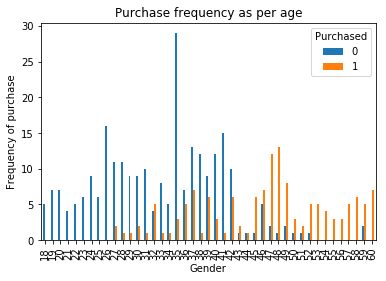

In [82]:
%matplotlib inline 
pd.crosstab(data.Age,data.Purchased).plot(kind='bar')
plt.title('Purchase frequency as per age')
plt.xlabel('Gender')
plt.ylabel('Frequency of purchase')

In [83]:
#train n test
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [112]:
x = data.iloc[:, [2, 3]].values 

y = data.iloc[:, 4].values

In [115]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [93]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [99]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [100]:

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
#predicting
y_pred = classifier.predict(xtest)

In [102]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 
#
#    [TP , FN ]
#    [FP , TN ]

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [103]:

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


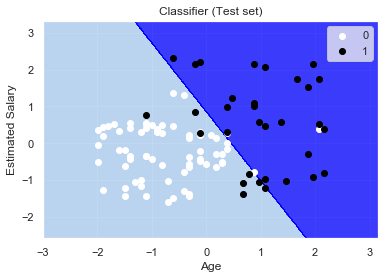

In [111]:
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('#ABCDEF', 'Blue'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('White', 'Black'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()